In [1]:
!pip install stanza

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 31.0 MB/s eta 0:00:00


In [2]:
!pip install es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 67.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 659.5/659.5 kB 37.5 MB/s eta 0:00:00
  Attempting uninstall: wasabi
    Found existing installation: wasabi 1.1.3
    Uninstalling wasabi-1.1.3:
      Successfully uninstalled wasabi-1.1.3
  Attempting uninstall: typer
    Found existing installation: typer 0.12.5
    Uninstalling typer-0.12.5:
      Successfully uninstalled typer-0.12.5
  Attempting uninstall: smart-open
    Found existing installation: smart-open 7.0.5
    Uninstalling smart-open-7.0.5:
      Successfully un

In [3]:
!pip install language_tool_python

In [4]:
!python -m spacy download es_core_news_lg

2024-11-10 16:03:20.911876: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-10 16:03:20.937909: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-10 16:03:20.947254: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-10 16:03:20.965319: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-10 16:03:22.351793: W tensorflow/compiler/tf2

In [5]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 1.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp310-cp310-linux_x86_64.whl size=4296185 sha256=51a324365a5287581642d9f6b0864b52f2647400ac8d60645eba6988cc371746
  Stored in directory: /root/.cache/pip/wheels/0d/a2/00/81db54d3e6a8199b829d58e02cec2ddb20ce3e59fad8d3c92a
Successfully built fasttext


In [6]:
!pip install kneed

In [7]:
!pip install plot_metric

In [8]:
!pip install torch

In [49]:
import pandas as pd
import spacy
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import roc_auc_score, confusion_matrix, precision_score, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import fasttext
import gensim.downloader as api

In [55]:
# Cargar datos de entrenamiento y prueba
df_sarcasmo_train = pd.read_csv('/content/Sarcasmo_train.csv', sep=';')
df_sarcasmo_test = pd.read_csv('/content/Sarcasmo_test.csv', sep=';')

In [56]:
df_sarcasmo_train.head()

,Locutor,Locución,Sarcasmo
0,archer,"No, era por saber si tenía que llevar un saco ...",Si
1,archer,"A quién le importa? No, lo pregunto de verdad",No
2,archer,Pero voy a dar por hecho que ha pedido refuerzos,No
3,malory,¿Por qué no te callas? Tengo que pensar,No
4,slater,"Sí, sospechábamos un poco",No


In [57]:
df_sarcasmo_test.head()

,Locutor,Locución,Sarcasmo
0,slater,Y por qué tienes un bebé?,No
1,randy,"Cielo santo, sí. Me encantaría ser el entrenad...",Si
2,archer,"Si nos pasa algo a los dos, ¿quién se hará car...",No
3,madre de stan,"Stanley, solo busca tus cosas y nos vamos a casa",No
4,stan,"Ah, sí esto podría funcionar",No


In [58]:
# Cargar el modelo Spacy para español
nlp = spacy.load('es_core_news_sm')

In [59]:
# Preprocesamiento y contar categorías gramaticales
def preprocess_text(text):
    doc = nlp(text)
    noun_count = len([token for token in doc if token.pos_ == 'NOUN'])
    verb_count = len([token for token in doc if token.pos_ == 'VERB'])
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return ' '.join(tokens), noun_count, verb_count


In [60]:
# Aplicar preprocesamiento a train y test
df_sarcasmo_train[['processed_Locución', 'noun_count', 'verb_count']] = df_sarcasmo_train['Locución'].apply(lambda x: pd.Series(preprocess_text(x)))
df_sarcasmo_test[['processed_Locución', 'noun_count', 'verb_count']] = df_sarcasmo_test['Locución'].apply(lambda x: pd.Series(preprocess_text(x)))


In [61]:
# Convertir la columna 'Sarcasmo' en etiquetas numéricas
le = LabelEncoder()
df_sarcasmo_train['Sarcasmo'] = le.fit_transform(df_sarcasmo_train['Sarcasmo'])
df_sarcasmo_test['Sarcasmo'] = le.transform(df_sarcasmo_test['Sarcasmo'])


In [62]:
# Dividir los datos en entrenamiento y prueba
X_train = df_sarcasmo_train['processed_Locución']
y_train = df_sarcasmo_train['Sarcasmo']
X_test = df_sarcasmo_test['processed_Locución']
y_test = df_sarcasmo_test['Sarcasmo']

In [64]:
# Tokenización y entrenamiento con BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
train_encodings = tokenizer(X_train.tolist(), return_tensors='pt', padding=True, truncation=True, max_length=256)
test_encodings = tokenizer(X_test.tolist(), return_tensors='pt', padding=True, truncation=True, max_length=256)


In [65]:
train_labels = torch.tensor(y_train.values)
test_labels = torch.tensor(y_test.values)

In [66]:
train_dataset = TensorDataset(train_encodings['input_ids'], train_encodings['attention_mask'], train_labels)
test_dataset = TensorDataset(test_encodings['input_ids'], test_encodings['attention_mask'], test_labels)


In [67]:
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8)

In [68]:
# Modelo BERT con ajuste de pesos para clases desbalanceadas
class_weights = torch.tensor([1.0, 5.0]).to(device)  # Aumentar el peso de la clase 1
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2).to(device)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [69]:
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
loss_fct = torch.nn.CrossEntropyLoss(weight=class_weights)

In [70]:
# Entrenar BERT
model.train()
for batch in train_loader:
    optimizer.zero_grad()
    input_ids, attention_mask, labels = [b.to(device) for b in batch]
    outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
    loss = outputs.loss
    loss.backward()
    optimizer.step()

In [71]:
# Evaluar BERT
model.eval()
predictions = []
probs = []
with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, _ = [b.to(device) for b in batch]
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        predictions.extend(torch.argmax(logits, dim=1).cpu().numpy())
        probs.extend(torch.softmax(logits, dim=1)[:, 1].cpu().numpy())


In [72]:
roc_auc_bert = roc_auc_score(y_test, probs)
print(f"BERT AUC: {roc_auc_bert}")

BERT AUC: 0.7306937756375959


In [76]:
# Graficar la matriz de confusión y la curva ROC
def predicciones_train(ytrue, yhat, probs=None):
    # Matriz de confusión
    matriz_confusion = pd.DataFrame(confusion_matrix(ytrue, yhat))
    plt.figure(figsize=(8,6))
    sns.heatmap(matriz_confusion, linewidth=0.01, annot=True, cmap='Blues', fmt='.0f')
    plt.title('Matriz de confusión para clasificación')
    plt.xlabel('Valores predichos'); plt.ylabel('Valores observados')
    plt.show()

    # Curva ROC
    print(f'El área bajo la curva ROC es: {roc_auc_score(ytrue, probs):.5f}')
    fpr, tpr, _ = roc_curve(ytrue, probs)
    roc_auc = auc(fpr, tpr)

    # Graficar la curva ROC
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend(loc="lower right")
    plt.show()

Resultados para BERT:


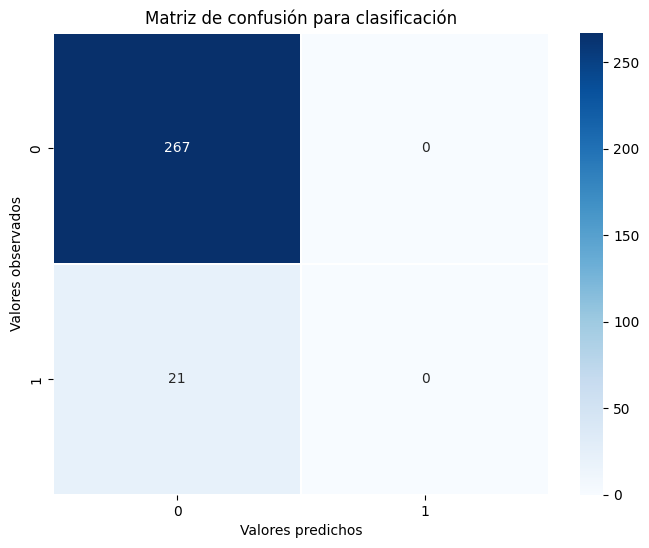

El área bajo la curva ROC es: 0.73069


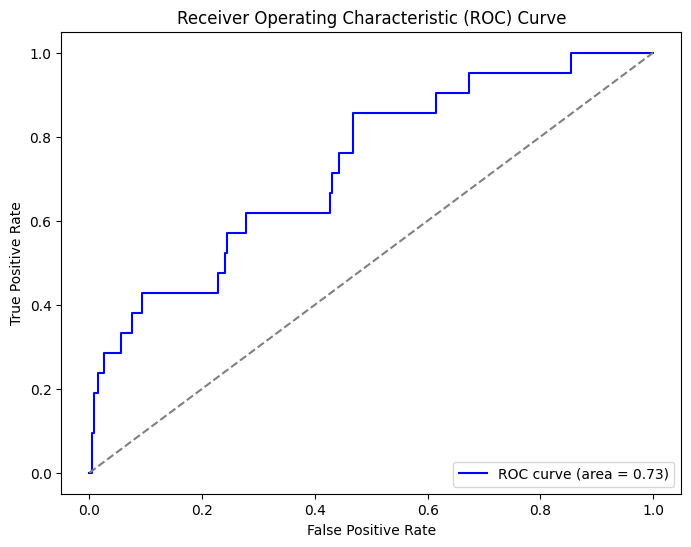

In [77]:
# Llamar a la función con las predicciones de BERT
print("Resultados para BERT:")
predicciones_train(y_test, predictions, probs)

In [78]:
# Entrenar y evaluar FastText
df_sarcasmo_train[['Sarcasmo', 'processed_Locución']].to_csv('sarcasmo_train.txt', index=False, header=False, sep=' ')
fasttext_model = fasttext.train_supervised(input='sarcasmo_train.txt')


In [81]:
# Predicciones con FastText
fasttext_predictions = []
for text in X_test.tolist():
    prediction = fasttext_model.predict(text)
    # Check if prediction is empty
    if prediction[0]:  # If not empty
        fasttext_predictions.append(prediction[0][0])
    else:  # Handle empty prediction
        fasttext_predictions.append("__label__0")  # or any default label

fasttext_labels = [1 if pred == '__label__1' else 0 for pred in fasttext_predictions]
roc_auc_fasttext = roc_auc_score(y_test, fasttext_labels)
print(f"FastText AUC: {roc_auc_fasttext}")

FastText AUC: 0.5


Resultados para FastText:


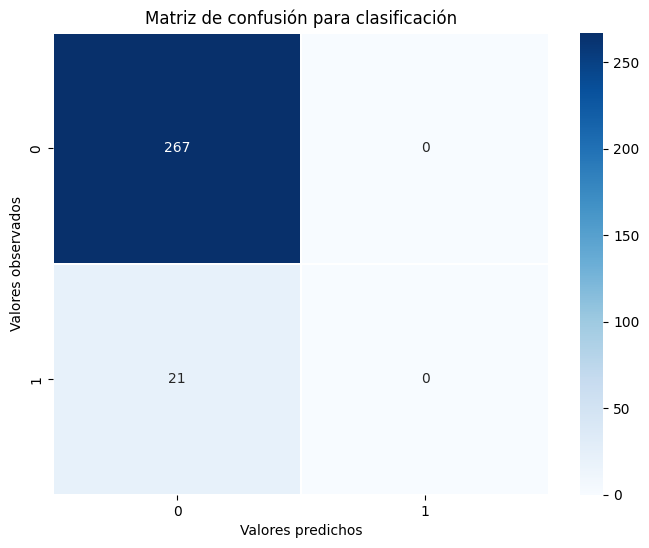

El área bajo la curva ROC es: 0.50000


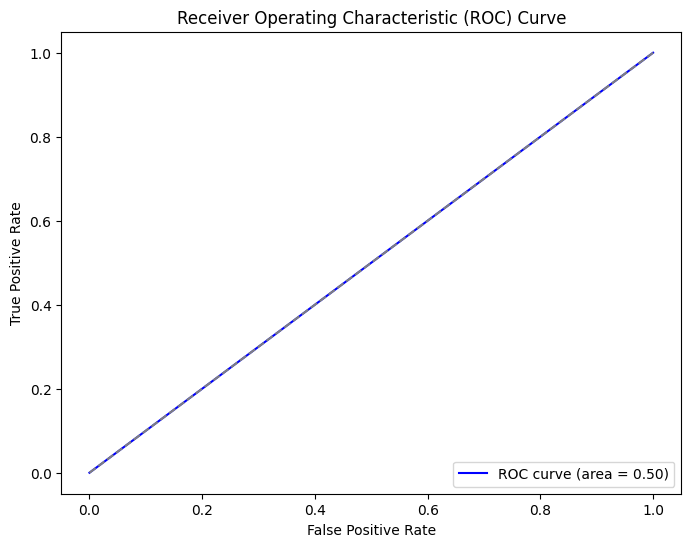

In [80]:
# Función para mostrar los resultados de FastText
print("Resultados para FastText:")
predicciones_train(y_test, fasttext_labels, probs=fasttext_labels)  # Aquí usamos `probs` como el valor de probabilidad para mostrar la curva ROC


In [41]:
# Gensim (o FastText) en lugar de FastText
word_vectors = api.load("glove-wiki-gigaword-100")

[==================================================] 100.0% 128.1/128.1MB downloaded


In [45]:
def gensim_predict(texts):
    predictions = []
    for text in texts:
        tokens = text.split()
        embeddings = [word_vectors[token] for token in tokens if token in word_vectors]

        if len(embeddings) > 0:
            # Sumar los embeddings de los tokens y calcular el promedio
            embedding_avg = sum(embeddings) / len(embeddings)
            predictions.append(1 if sum(embedding_avg) > 0 else 0)
        else:
            # Si no hay embeddings, predice una clase por defecto (por ejemplo, 0)
            predictions.append(0)

    return predictions



In [46]:
gensim_preds = gensim_predict(X_test)
roc_auc_gensim = roc_auc_score(y_test, gensim_preds)
print(f"Gensim AUC: {roc_auc_gensim}")

Gensim AUC: 0.5350454788657035


In [53]:
precision_gensim = precision_score(y_test, gensim_preds)
print(f"Gensim Precision: {precision_gensim}")

Gensim Precision: 0.08791208791208792


Resultados para Gensim:


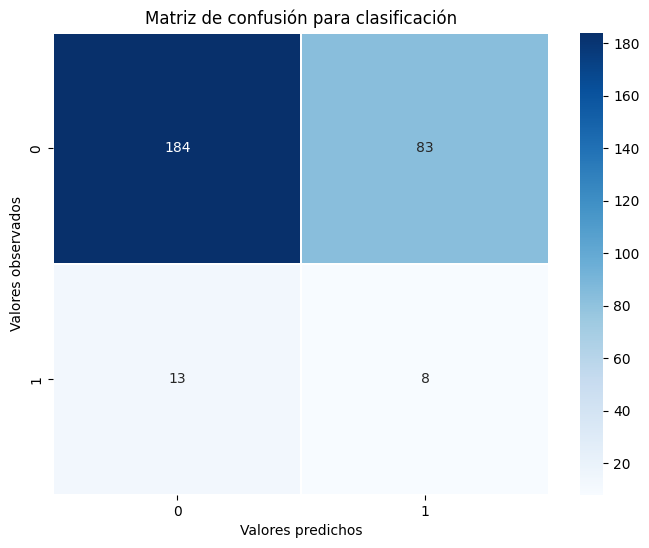

El área bajo la curva ROC es: 0.53505


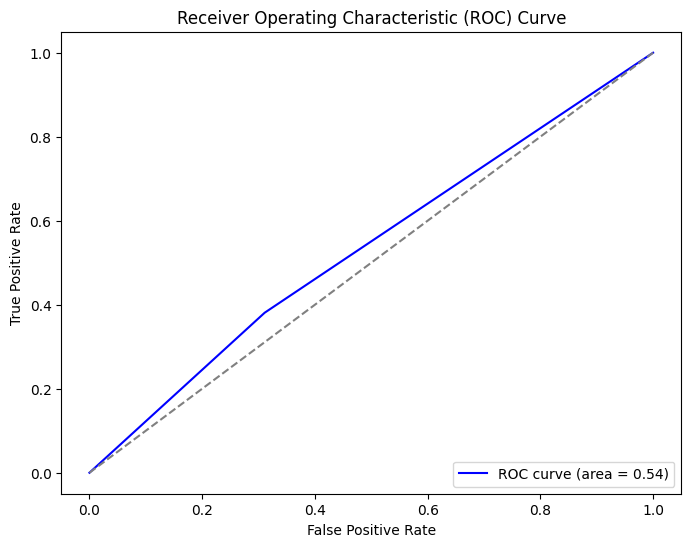

In [47]:
# Resultados de Gensim
print("Resultados para Gensim:")
predicciones_train(y_test, gensim_preds)

In [38]:
# Guardar métricas en CSV
import csv
with open('sarcasmo_metrics.csv', mode='w') as file:
    writer = csv.writer(file)
    writer.writerow(['Modelo', 'AUC'])
    writer.writerow(['BERT', roc_auc_bert])
    writer.writerow(['FastText', roc_auc_fasttext])